In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%config IPCompleter.greedy = True

In [2]:
ruta_proyecto = r'C:\Users\manug\Desktop\Data Science\DataSets\Wall-Mart\wallmart\\'

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

In [4]:
cat = pd.read_pickle(ruta_proyecto + '02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '02_Datos/03_Trabajo/' + nombre_num)

In [5]:
num.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380107 entries, 2010-02-05 to 2012-07-20
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         380107 non-null  int64  
 1   temperature   380107 non-null  float64
 2   fuel_price    380107 non-null  float64
 3   markdown1     380107 non-null  float64
 4   markdown2     380107 non-null  float64
 5   markdown3     380107 non-null  float64
 6   markdown4     380107 non-null  float64
 7   markdown5     380107 non-null  float64
 8   cpi           380107 non-null  float64
 9   unemployment  380107 non-null  float64
 10  size          380107 non-null  int64  
 11  dept          380107 non-null  int64  
 12  weekly_sales  380107 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 40.6 MB


## EDA categóricas

### Análisis estadistico (conteo de frecuencias)

In [6]:
incluir = cat.columns.to_list()
incluir

['isholiday', 'type']

In [7]:
def frecuencias_cat(df_cat):
    df_cat = df_cat.astype(str)

    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack().reset_index() \
        .rename(columns = {'level_0':'variable', 'level_1':'valor', 0:'frecuencia'}).sort_values(by = ['variable', 'frecuencia'])
    return(resultado)

In [8]:
pd.set_option('display.max_rows', None)

frecuencias_cat(cat[incluir])

,variable,valor,frecuencia
1,isholiday,True,0.070230
0,isholiday,False,0.929770
4,type,C,0.100735
3,type,B,0.387993
2,type,A,0.511272


### Análisis gráfico

In [9]:
def graficos_eda_categoricas(df_cat):
    
    from math import ceil
    filas = ceil(df_cat.shape[1] / 2)
    
    f,ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    ax = ax.flat

    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 12)

    plt.tight_layout()
    plt.show()

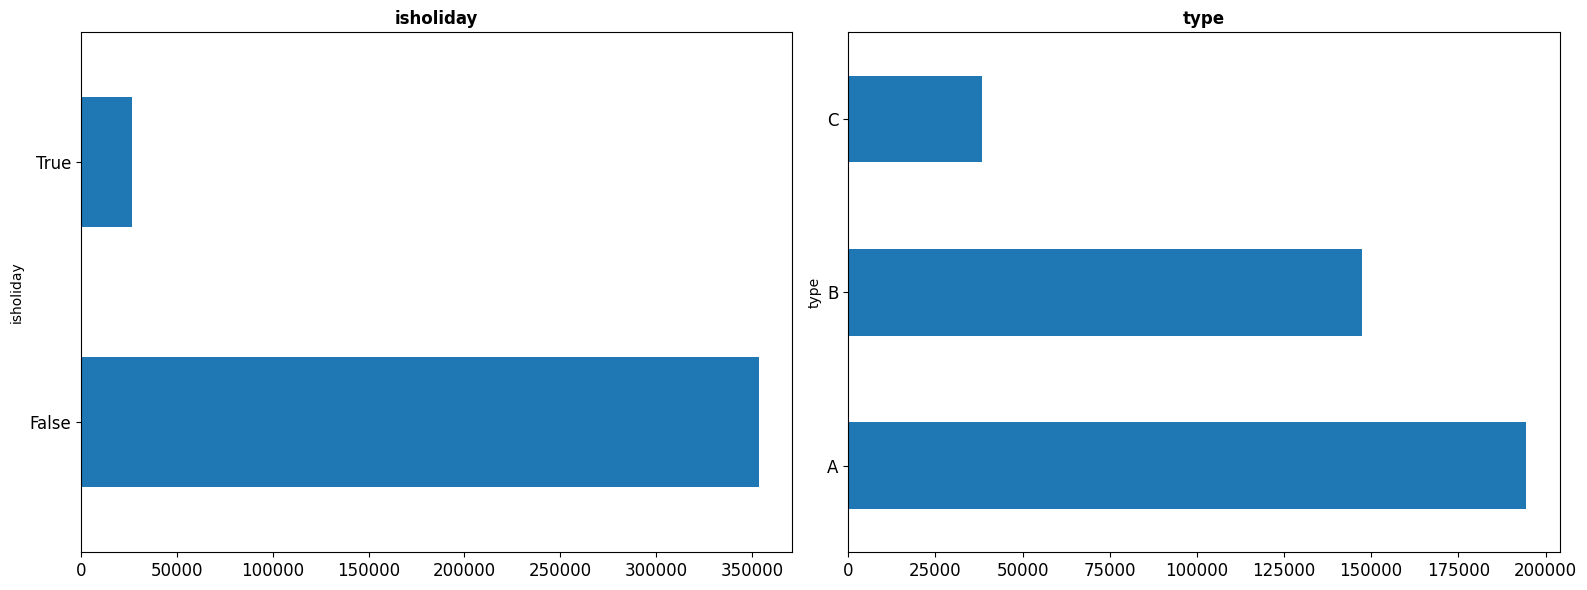

In [10]:
graficos_eda_categoricas(cat[incluir])

In [11]:
cat.head()

,isholiday,type
date,,
2010-02-05,False,A
2010-02-05,False,A
2010-02-05,False,A
2010-02-05,False,A
2010-02-05,False,A


### EDA numéricas

### Análisis estadístico

In [12]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
store,380107.0,22.193253,12.782214,1.000,11.0000,22.00000,33.000000,45.000000
temperature,380107.0,58.871359,18.626530,-2.060,45.4200,60.13000,73.250000,100.140000
fuel_price,380107.0,3.315335,0.454139,2.472,2.8780,3.34600,3.699000,4.308000
markdown1,380107.0,2077.955238,5579.993062,0.000,0.0000,0.00000,577.200000,88646.760000
markdown2,380107.0,970.553764,5346.782671,-265.760,0.0000,0.00000,0.000000,104519.540000
markdown3,380107.0,515.537808,5820.622148,-29.100,0.0000,0.00000,0.520000,141630.610000
markdown4,380107.0,865.199701,3778.952785,0.000,0.0000,0.00000,10.160000,67474.850000
markdown5,380107.0,1396.142839,4213.580238,0.000,0.0000,0.00000,1276.150000,108519.280000
cpi,380107.0,170.712288,38.951221,126.064,131.9809,182.25696,211.770897,225.687112
unemployment,380107.0,8.048953,1.863595,4.077,6.9860,7.93100,8.595000,14.313000


In [13]:
num.head()

,store,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,size,dept,weekly_sales
date,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,1,24924.50
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,2,50605.27
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,3,13740.12
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,4,39954.04
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,5,32229.38


### Análisis gráfico

* Se puede ver un pico estacional que se repite en el ultimo trimetre de cada año.

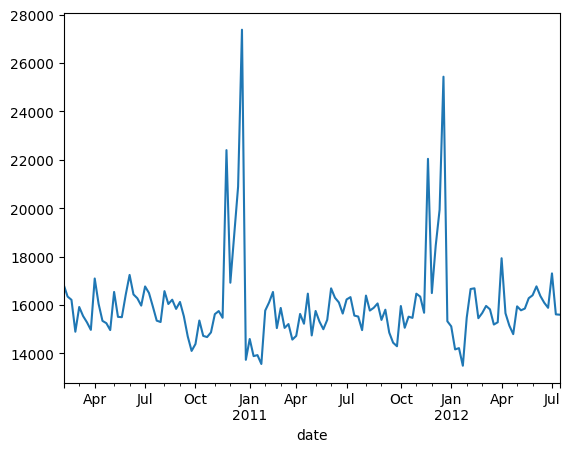

In [37]:
num.groupby('date').weekly_sales.mean().plot();
plt.show()

* Al desglosarlo por tienda se observa que este pico estacional esta presente en casi todas las tiendas, con excepción de las tiendas 33, 36, 38, 42 y 43. 

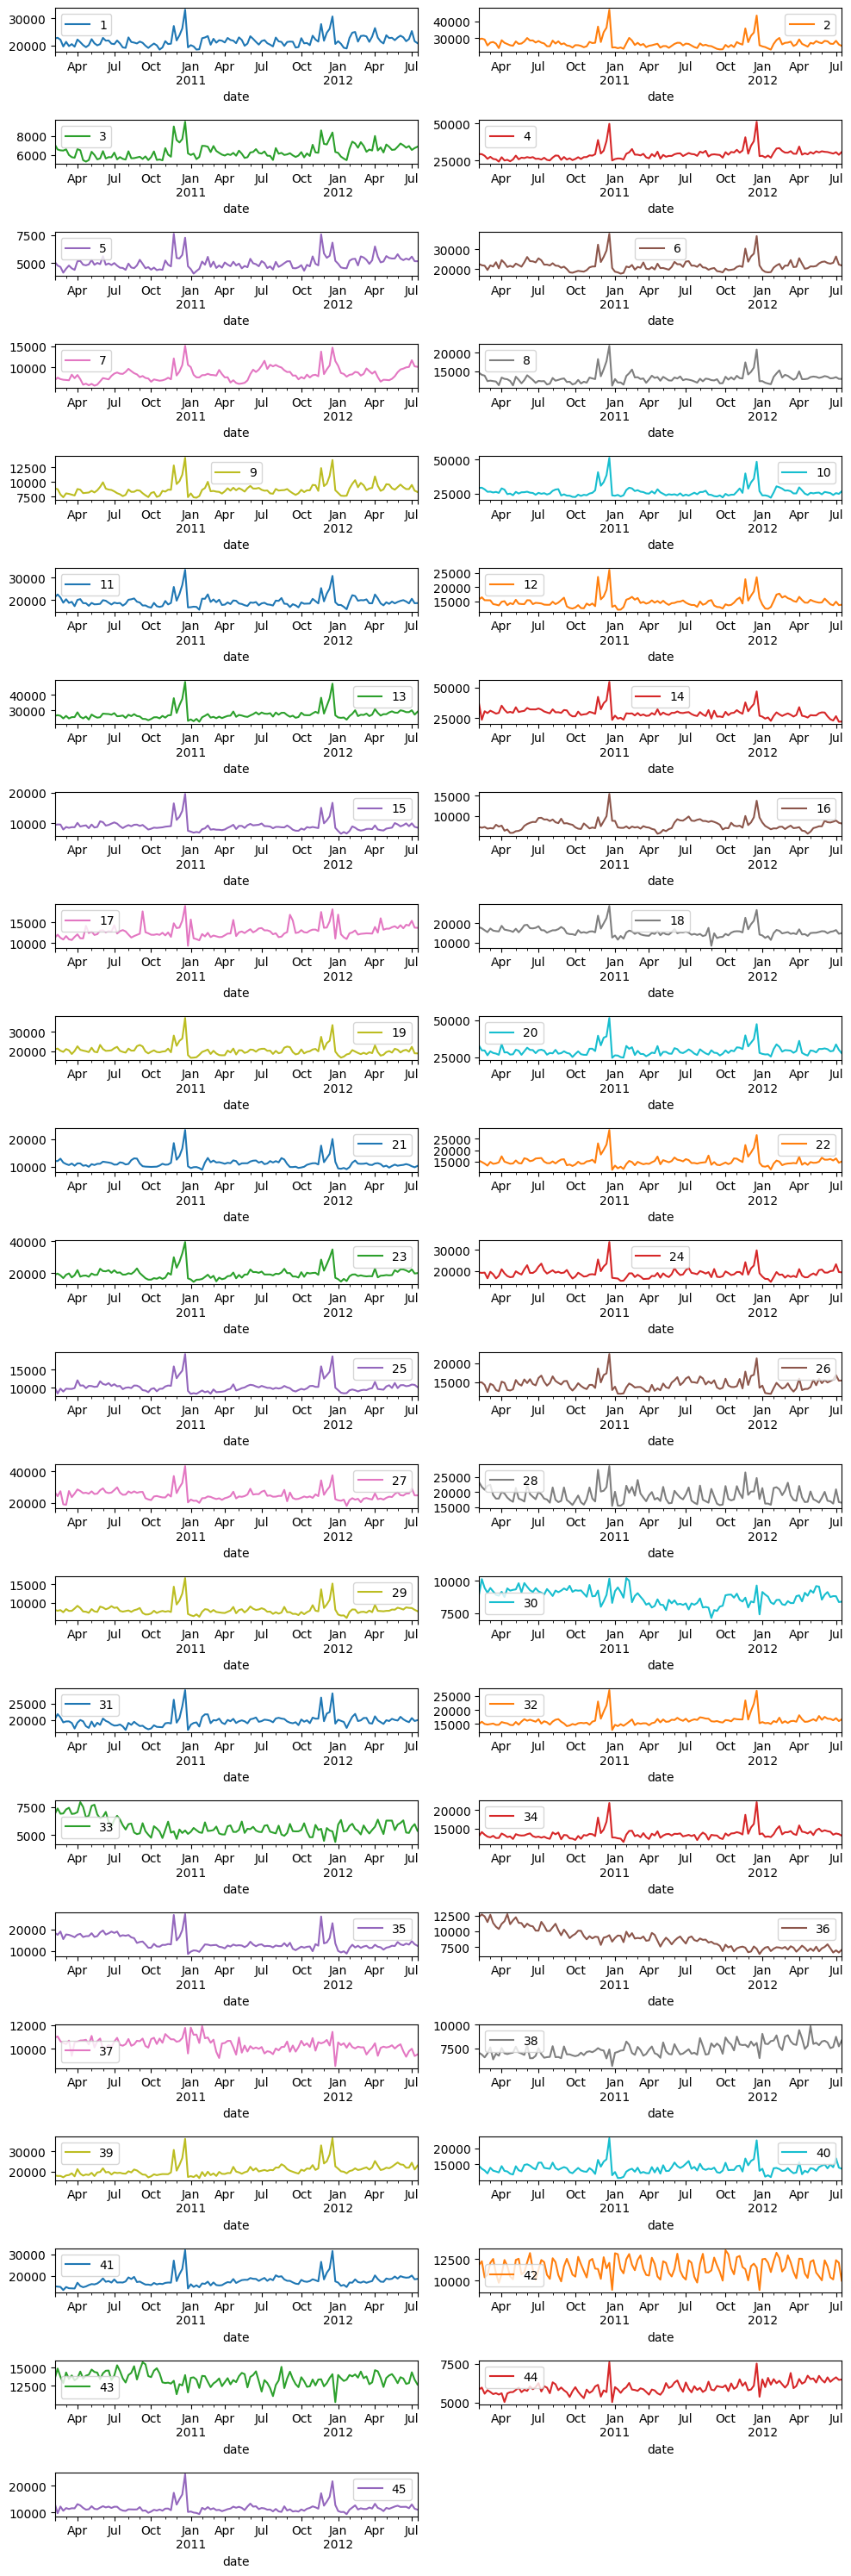

In [38]:
num.groupby(['date','store']).weekly_sales.mean().unstack().plot(subplots = True, layout = (23,2), sharex = False, figsize=(10,30));
plt.tight_layout()
plt.show();

* Análisis de las ventas semanes por departamento de cada tienda.

In [30]:
num.groupby(['date', 'store', 'dept']).weekly_sales.sum().to_frame().sort_values(by =['date', 'store', 'weekly_sales'], ascending = [True, True, False]).head()

weekly_sales
date       store dept              
2010-02-05 1     92       139884.94
                 38       115564.35
                 95       106690.06
                 72        98499.12
                 90        76419.47

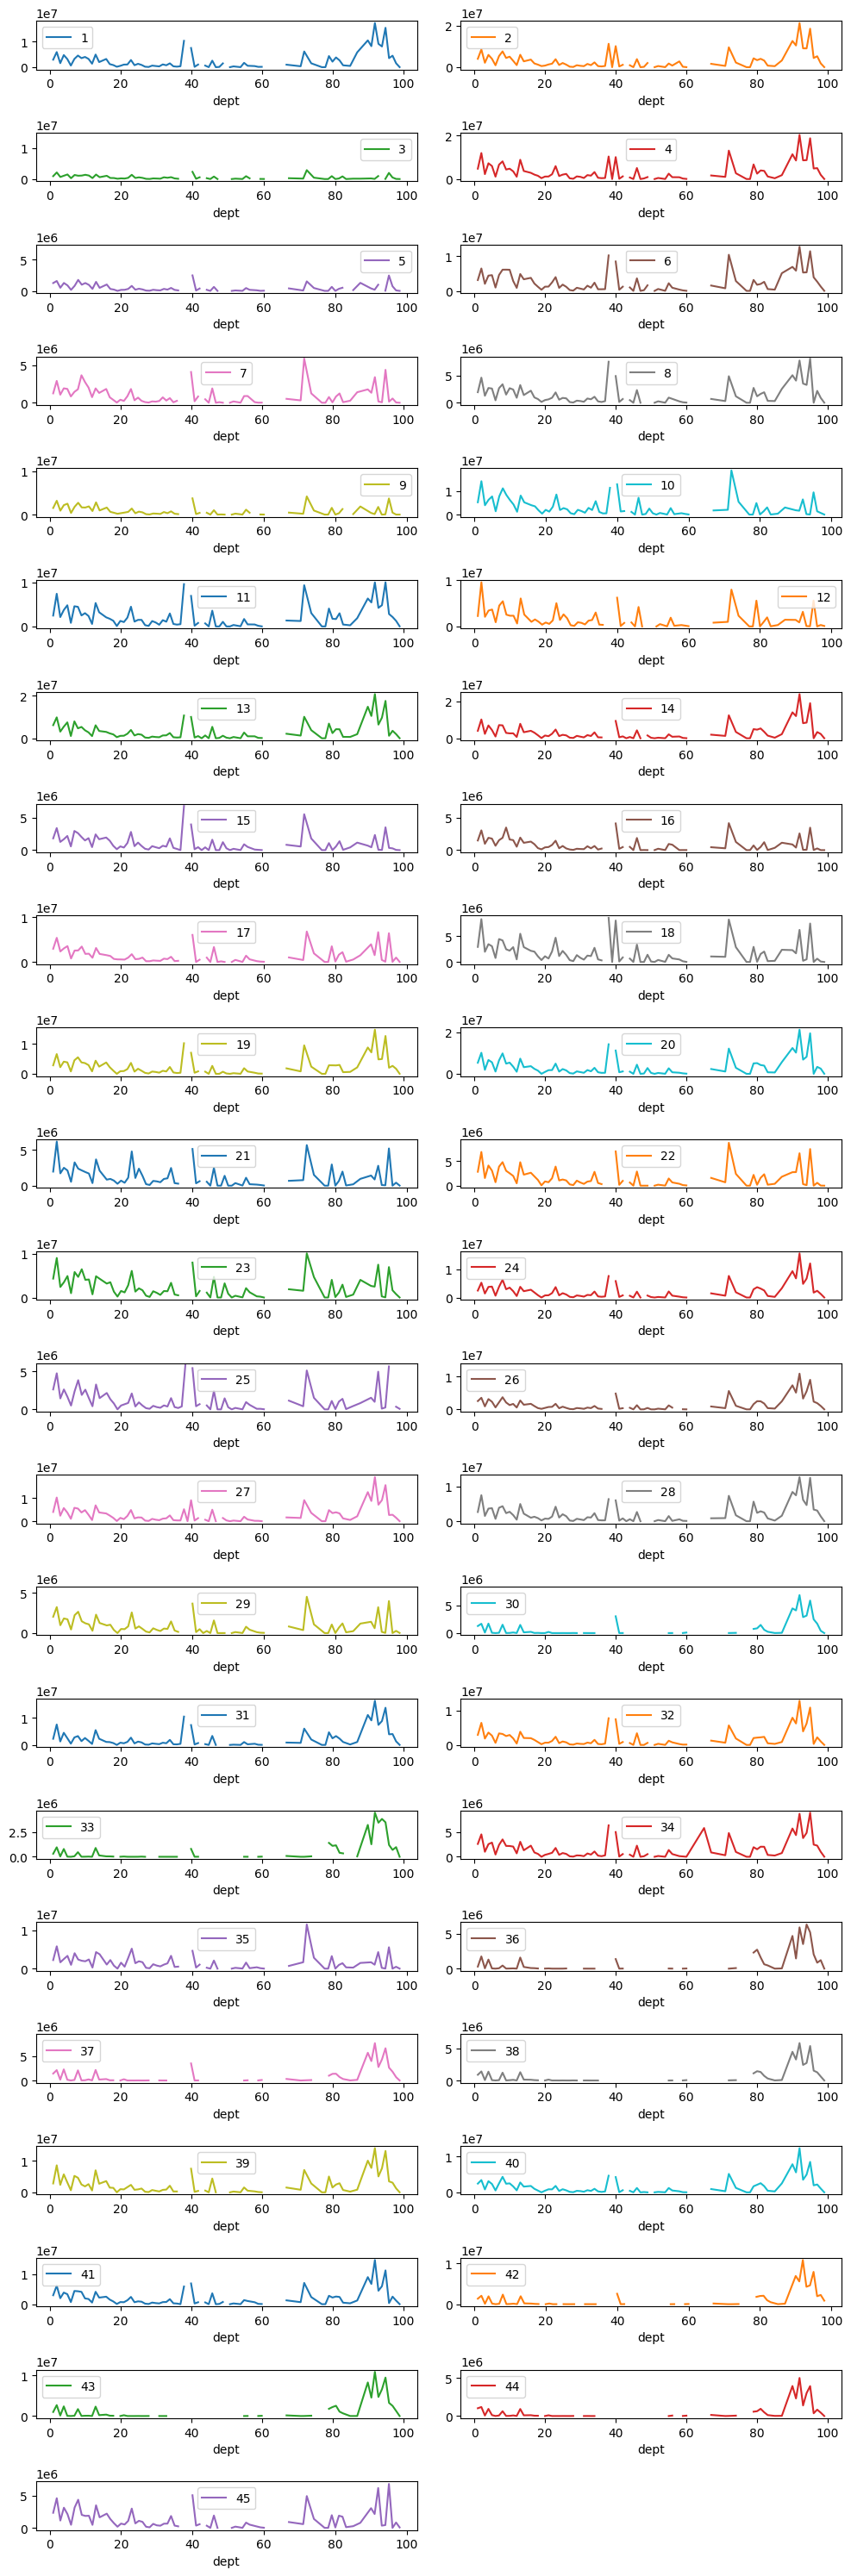

In [46]:
num.groupby(['dept', 'store']).weekly_sales.sum().unstack().plot(subplots = True, layout = (23,2), sharex = False, figsize=(10,30));
plt.tight_layout()
plt.show();

### Guardar datasets EDA

In [50]:
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [51]:
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)